# Machine Learning Project - Part B - K Means

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# https://www.python-graph-gallery.com/

# Read File - X_test & Xy_train

In [2]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\X_test_F.xlsx"
X_test = pd.read_excel(directory)
X_test = pd.DataFrame(X_test)
X_test = pd.get_dummies(X_test, columns=['Blood_Pressure'])

directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\Xy_train_F.xlsx"
df = pd.read_excel(directory)
df = pd.DataFrame(df)

X_train = df.drop('smoking', 1)
y_train = df['smoking']
X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])

print("Done")

Done


# StandardScaler & PCA & K-Means

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
X = X_train
y = y_train

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA on the scaled training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Perform k-means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=2)
y_train_pred = kmeans.fit_predict(X_train_pca)

# Transform the scaled test data using the PCA model from the training data
X_test_pca = pca.transform(X_test_scaled)

# Predict the labels for the test data
y_test_pred = kmeans.predict(X_test_pca)

# Calculate the accuracy of the train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", round(train_accuracy*100,2),"%")
print("Test accuracy:", round(test_accuracy*100,2),"%")


Train accuracy: 66.99 %
Test accuracy: 67.6 %


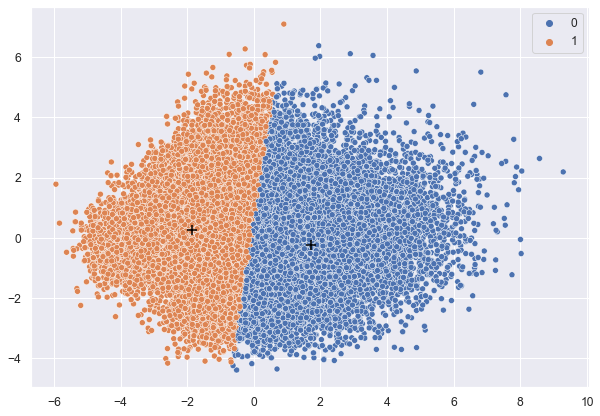

In [4]:
# Plot the results
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.1)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_pred)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='+', s=100, color='black')
plt.show()

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X_train_scaled)
data_pca = pca.fit_transform(X_train_scaled)
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
Y_train = pd.DataFrame(y_train).reset_index()['smoking']
data_pca['smoking'] = Y_train

In [6]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.22439891 0.12130269]
0.34570160026386865


In [7]:
data_pca.head(10)

,PC1,PC2,smoking
0,-2.384361,-0.435530,0
1,2.861322,0.046088,1
2,-3.173180,0.105492,0
3,1.926699,-0.377327,0
4,-1.316067,2.165956,0
5,0.797225,0.556684,0
6,-1.286826,0.980399,0
7,-2.372921,-0.432483,0
8,0.457946,0.802115,1
9,0.249611,-3.224494,0


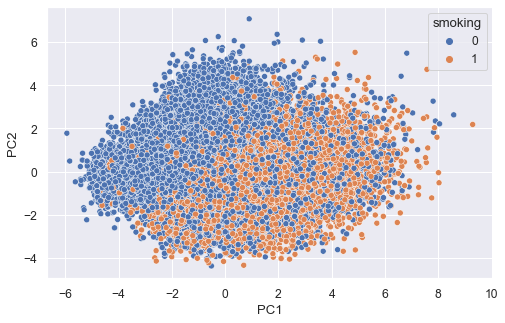

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PC1', y='PC2', hue='smoking', data=data_pca)
plt.show()

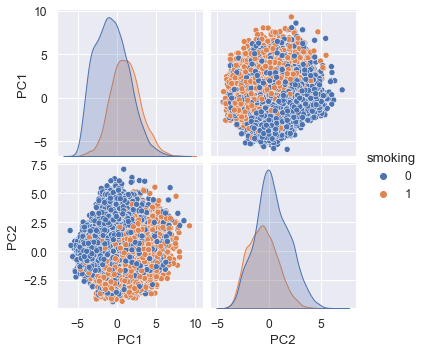

In [9]:
sns.pairplot(data_pca, hue='smoking')
plt.show()

In [10]:
# k-means with 2 clusters- defult
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X_train_scaled)
data_pca['cluster'] = k_means.predict(X_train_scaled)

In [11]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.22439891 0.12130269]
0.34570160026386865


In [12]:
k_means.cluster_centers_

array([[ 0.64308268, -0.21800929,  0.54960054,  0.62753911,  0.37206964,
         0.37500878,  0.19278598,  0.04051953,  0.37524501, -0.34868441,
         0.03996464,  0.5675051 ,  0.25473635,  0.41253679,  0.41839375,
         0.08467644,  0.06828948,  0.42652865,  0.16428055,  0.09736876,
         0.21400023, -0.36666116],
       [-0.72991078,  0.2474446 , -0.62380682, -0.71226854, -0.42230595,
        -0.42564193, -0.21881567, -0.04599042, -0.42591005,  0.39576328,
        -0.04536061, -0.64412883, -0.28913049, -0.46823691, -0.47488468,
        -0.09610934, -0.07750982, -0.48411793, -0.18646147, -0.11051535,
        -0.24289424,  0.41616723]])

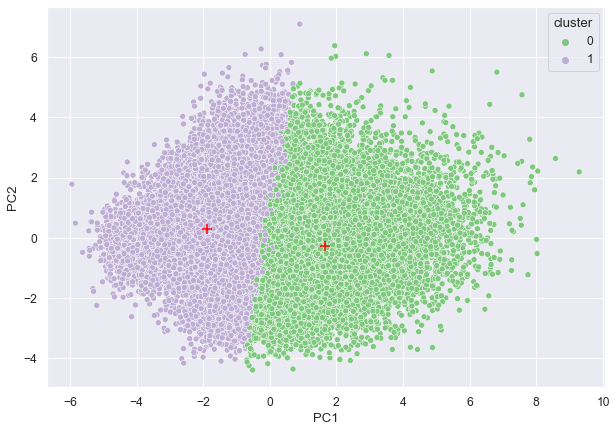

In [13]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=data_pca, palette='Accent')
plt.scatter(pca.transform(k_means.cluster_centers_)[:, 0], pca.transform(k_means.cluster_centers_)[:, 1], marker='+', s=100 ,color='red')
plt.show()

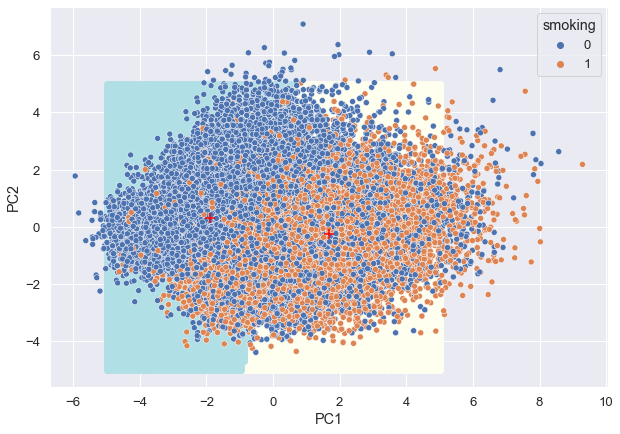

In [14]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.2)
x_test1 = np.linspace(-5, 5, 100)
y_test1 = np.linspace(-5, 5, 100)
predictions = pd.DataFrame(columns=['X1', 'X2', 'y'])
for x in x_test1:
    for y in y_test1:
        pred = k_means.predict(pca.inverse_transform(np.array([x, y])).reshape(-1, 22))[0]
        temp_pred = pd.DataFrame([[x, y, pred]], columns=['X1', 'X2', 'y'])
        predictions = pd.concat([predictions, temp_pred], ignore_index=True)

plt.scatter(x=predictions[predictions.y == 0]['X1'], y=predictions[predictions.y == 0]['X2'],c='ivory')
plt.scatter(x=predictions[predictions.y == 1]['X1'], y=predictions[predictions.y == 1]['X2'], c='powderblue')
sns.scatterplot(x='PC1', y='PC2', hue='smoking', data=data_pca)
plt.scatter(pca.transform(k_means.cluster_centers_)[:, 0], pca.transform(k_means.cluster_centers_)[:, 1],
            marker='+',
            s=100, color='red')
plt.show()

In [15]:
print("Train Accuracy:")
Ac1 = accuracy_score(y_true=y_test, y_pred=k_means.predict(X_test_scaled))
print(round(Ac1*100,2),'%')

print("\nTest Accuracy:")
Ac2 = accuracy_score(y_true=Y_train, y_pred=k_means.predict(X_train_scaled))
print(round(Ac2*100,2),'%')

Train Accuracy:
32.66 %

Test Accuracy:
32.7 %


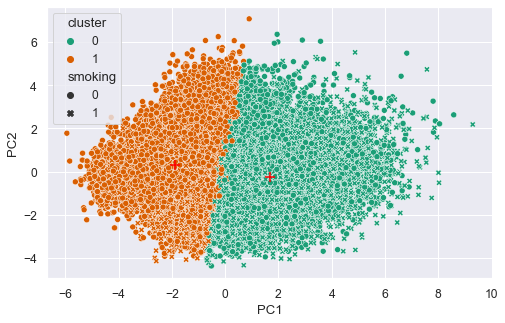

In [16]:
# show clusters and class on PCA diagram
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.1)
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=data_pca, palette='Dark2', style='smoking')
plt.scatter(pca.transform(k_means.cluster_centers_)[:, 0], pca.transform(k_means.cluster_centers_)[:, 1],
            marker='+',
            s=100, color='red')
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tqdm import tqdm

In [18]:
iner_list = []
dbi_list = []
sil_list = []

for n_clusters in tqdm(range(2, 10, 1)):
    k_means = KMeans(n_clusters=n_clusters, random_state=42)
    k_means.fit(X_train_scaled)
    assignment = k_means.predict(X_train_scaled)
    
    iner = k_means.inertia_
    sil = silhouette_score(X_train_scaled, assignment)
    dbi = davies_bouldin_score(X_train_scaled, assignment)
    
    dbi_list.append(dbi)
    sil_list.append(sil)
    iner_list.append(iner)

100%|██████████| 8/8 [05:38<00:00, 42.32s/it]


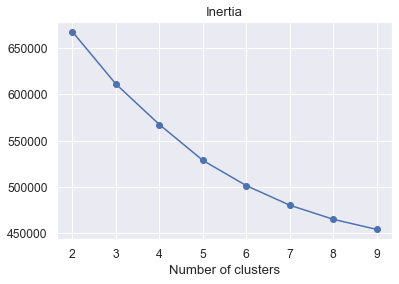

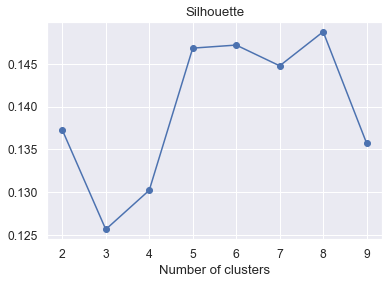

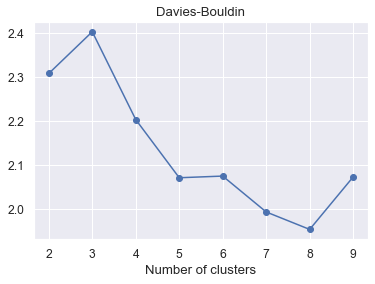

In [19]:
plt.plot(range(2, 10, 1), iner_list, marker='o')
plt.title("Inertia")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), sil_list, marker='o')
plt.title("Silhouette")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(range(2, 10, 1), dbi_list, marker='o')
plt.title("Davies-Bouldin")
plt.xlabel("Number of clusters")
plt.show()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


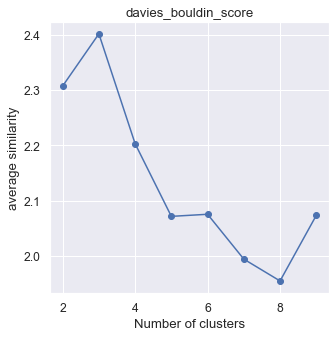

In [20]:
plt.figure(figsize=(5,5)) 
plt.plot(range(2, 10, 1), dbi_list, marker='o')
plt.title("davies_bouldin_score")
plt.xlabel("Number of clusters")
plt.ylabel("average similarity")
plt.show()

In [21]:
# k-means with 2 clusters- defult
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=8, random_state=42)
k_means.fit(X_train_scaled)
data_pca['cluster'] = k_means.predict(X_train_scaled)

In [22]:
k_means = KMeans(n_clusters=8, random_state=42)
k_means.fit(X_train_scaled)
assignment = k_means.predict(X_train_scaled)

sil = silhouette_score(X_train_scaled, assignment)
dbi = davies_bouldin_score(X_train_scaled, assignment)
sil
dbi

1.9542630401331296

In [24]:
sil

0.1487534738547679

In [25]:
dbi

1.9542630401331296